# **Project on Prediction of heart disease.**



Globally, one of the reason behind most of the deaths is Cardiovascular diseases, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths. Among which one-third deaths occur prematurely of people under age of 70 year old. Such peoples need early detection and management. In this project I have build a model which will predict whether a person is suffering from any heart disease. 

## Dataset

Dataset for this project is taken from kaggle open source datasets. (https://www.kaggle.com/fedesoriano/heart-failure-prediction)

### Attribute Information

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

### Algorithms 

In this project we are going to use following algorithms:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN Classifier


### Importing pandas, file and creating Data frame

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
'df' is a dataframe which will include file containing all data points. Internal file is acessed using its path of file mentioned in paranthesis. The 'r' in begining of path allows to put the file path directly without editing in correct format.
df.info gives us information about dataframe, which includes the details about data type of variables and features, data size, column name, null values present.

In [56]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Omkar\Desktop\Python\_ML_\ML data sets\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,2,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,2,3,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


Names of columns helps to decide which features are to be used as input for model and which is target variable or lable which is to be predicted.
In this case column 'HeartDisease' is a target variable and remaining columns are used as input.

In [58]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

To get all input labels and target label, we associate them to a varible. X contains all inputs and y contains target lable.
Use .shape to check thier size.

In [59]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
X.shape

(918, 11)

In [60]:
y=df['HeartDisease']
y.shape

(918,)

### Train Test Split

From sklearn library we import train_test_split.
As input and target lables are separated, they are splited for training and testing purpose.
Usually between 60% to 80% split is used. Here I prefere 70% split. which means I will use 70% of data to train my model and remaining 30% to test.
X_train and y_train as train data and X_test is used to test and predict y_test.
To select data ponts randomly to split them as train or test, we use random state which creates random numbers according to which it will split our data points randomly as train or test.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, random_state = 252)

To check size of our train and test data we use .shape
We can see X train and y_train is split into 70% of total data.

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((642, 11), (276, 11), (642,), (276,))

### Applying algorithms

As we want to classify as if the patients have heart disease or not, we can use different clssification algorihtms like Logistic Regression, Decesion Tree, Random Forest, etc.
In this project we are going to apply multiple algorithms and compare thier results.

1st algorithm 

### Logistic Regression

This algorithm is suitable for binary results. It classifies into 0 and 1. It is used to understand relationship between the dependent variable and one or more independent variables.

In [63]:
from sklearn.linear_model import LogisticRegression

This Logistic Regression model created is limit to 500 iterations to reduce computing time.

In [64]:
model = LogisticRegression(max_iter= 500, random_state=252)

Then this model is fitted to train data points (X_train and y_train).

In [65]:
model.fit(X_train, y_train)

C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=252)

After training now its time to test our model using X_test and predict target values (y_pred)

In [66]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

We can see our model have predicted target values as binary digits, where 0 means patient which does not have any heart disease and 1 means patient which has heart disease.
To get more details about our result, we use classification report and confusion matrix

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
confusion_matrix(y_test, y_pred)

array([[105,  13],
       [ 19, 139]], dtype=int64)

This matrics shows that there are 105 patients which are correctly predicted as patients which has heart disease, where as 20 patients which has heart disease are mistaken as non heart disease.
Similarly 138 patients are correctly predicted as Non heart disease, where as 13 patients which does not have any heart disease are considered as patients having heart disease, which is an erorr.

In confusion matrics diagonal values are **Always** True Positive value.

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       118
           1       0.91      0.88      0.90       158

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276



Classification report gives us a report with details of actual numbers of heart disease and non-heart disease patients. This table include accuracy of model, precision and recall values of classifications predicted.

**Precision** is ratio tp/(tp+fp) where tp is true positive (0=105 & 1=138) fp is false positive (0=20 & 1=13)

this tells us the ability of model to consider a neagtive o/p as Positive. In this case it is instinctively ability of model to show a non-heart disease as heart disease patient.

**Recall** is ratio tp/(tp+fn) where fn is false negative (0=20 & 1=13)

Recall shows instinctively ability of model to show all positive samples, i.e., to show all paitents as heart disease or all as a non-heart disease.

### Statsmodel###

To get more detail about our result, we use statsmodel. 
Here we can see the impact of various lables on our model.
By looking at P value, we can determine the labels which does not contribute in result and remove them from model which will increase accuracy and reduce computation time.


In [70]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.Logit(y, X)

In [71]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.367378
         Iterations 7


In [72]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           11
Date:                Sat, 08 Jan 2022   Pseudo R-squ.:                  0.4656
Time:                        15:48:30   Log-Likelihood:                -337.25
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                6.190e-119
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5598      1.232      2.077      0.038       0.145       4.975
Age                0.0096      0.012      0.789      0.430      -0.014       0.033
Sex               -1.2112      0.252

Lables having P value > 0.1 can be drop from model, in this case Age, RestingBP, RestingECG has P value greater than 0.1.
So we will re-run this model by dropping those columns.

## Re-run Model

Dropping Age, RestingBP, RestingECG columns and creating new variable for input. So new variable (X1) have 8 columns instead of 11.

In [73]:
X1 = df[['Sex', 'ChestPainType', 'Cholesterol', 'FastingBS',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
X1.shape

(918, 8)

In [74]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y_train, y_test = train_test_split( X1, y, train_size = 0.7, random_state = 252)

In [75]:
X1_train.shape, X1_test.shape, y_train.shape, y_test.shape

((642, 8), (276, 8), (642,), (276,))

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter= 500, random_state=252)
model.fit(X1_train, y_train)

LogisticRegression(max_iter=500, random_state=252)

In [77]:
y_pred = model.predict(X1_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [78]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)


array([[105,  13],
       [ 21, 137]], dtype=int64)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       118
           1       0.91      0.87      0.89       158

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



After dropping columns, Only change we saw is in confusion matrix is in the number of non heart disease patients is reduced by 1 as that patient is predicted as heart disease. As the change is so small we cannot see changes in other parameters like accuracy, recall and precision.

2nd Algorithm
## Decision Tree

Decision tree is a most powerfull tool for classification and predition. It is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label. It can handle high dimensional data and has high accuracy. It creates linear splits among data, until it get similar data points in each sections. It can interpret outliers easily, but they are prone to overfitting.

To perform this algorithm, there is only change in algorthm selection from sklearn and model selection, all inputs and out variables remain same.

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth= 3) #max_depth gives the no. steps you want in decision tree diagram in the result, so we have selected 3 no. of steps. we can see those in result.
model 

DecisionTreeClassifier(max_depth=3)

In [81]:
model.fit(X1_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
y_pred = model.predict(X1_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

Again to Evaluate we require confusion matrix and classification report.

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[106,  12],
       [ 32, 126]], dtype=int64)

Here we can see changes in number of non heart disease patients is reduced by 10 as those patients are predicted as heart disease.
This led to reduction in accuracy by 4% (from 88% to 84%), similarly precision for 0 is dropped by 7% and recall for 1 is dropped by 7%.

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       118
           1       0.91      0.80      0.85       158

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



[Text(167.4, 190.26, 'X[7] <= 1.5\ngini = 0.496\nsamples = 642\nvalue = [292, 350]'),
 Text(83.7, 135.9, 'X[0] <= 1.5\ngini = 0.321\nsamples = 369\nvalue = [74, 295]'),
 Text(41.85, 81.53999999999999, 'X[4] <= 176.5\ngini = 0.239\nsamples = 310\nvalue = [43, 267]'),
 Text(20.925, 27.180000000000007, 'gini = 0.21\nsamples = 302\nvalue = [36, 266]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.499\nsamples = 59\nvalue = [31, 28]'),
 Text(104.625, 27.180000000000007, 'gini = 0.465\nsamples = 49\nvalue = [31, 18]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 50.0\ngini = 0.322\nsamples = 273\nvalue = [218, 55]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 0.5\ngini = 0.383\nsamples = 31\nvalue = [8, 23]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 

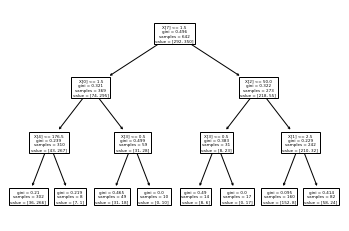

In [85]:
from sklearn.tree import plot_tree
plot_tree(model)

Here is our Decision Tree diagram with 3 steps as mentioned.
Also we conclude that accuracy we got in LogisticRegression > DecisionTree for this particular model.

3rd Algorithm

## Random Forest

Random Forest algorithm is a popular machine learning algorithm, it can be used for both classification and regression problems. When we combine multiple decision tree models we get random forest. This algorithm can overome disadvantage of desicion tree of overfitting.
It takes less time compared to others, has high accuracy even with large dataset and can maintain accuracy when a large proportion of data is missing.


In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X1_train, y_train)

RandomForestClassifier()

In [87]:
y_pred = model.predict(X1_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[105,  13],
       [ 18, 140]], dtype=int64)

By comparing this confusion matrix to decision tree we can see a lot of improvement and with respect to LogisticRegression too we can see that patients with heart disease is increase by 1 and false positive value is reduced by 3, which means overall accuracy of model is increased.

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       118
           1       0.92      0.89      0.90       158

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



Accuracy of model is increased by 1% compare to LogisticRegression and 4% compared to DecisionTree.
Values of precision for 0 and 1 is increased by 1% and 2% resp. similarly recall percentage is increased by 2% comparing to LogisticRegression.
In conclusion accuracy got this dataset till now is highest using RandomForest algorithm.

4th Algorithm

## KNN Classifier

KNN classifier stands for K Nearest Neighbor Classifier, K is the number of nearest neighbors. It is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications.
KNN algorithm used for both classification and regression problems. The number of neighbors is the core deciding factor. We have to calculate distance from all data points to get nearest points. KNN is also called lazy algorithm because for new variable we have to calculate distance every time. So it is not used in Big Data. In classification Majority wins and in regression we take average. 

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [91]:
model.fit(X1_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred = model.predict(X1_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [93]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[ 76,  42],
       [ 41, 117]], dtype=int64)

There are lot of changes in values of false negative and false positive values, which means there will be decrease in accuracy. 

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65       118
           1       0.74      0.74      0.74       158

    accuracy                           0.70       276
   macro avg       0.69      0.69      0.69       276
weighted avg       0.70      0.70      0.70       276



Here accuracy of model is dropped from 89% to 70%. This means we got the highest accuracy in RandomForest algorithm for this model.

## Conclusion

In this project, various algorithms are applied which are Logistic Regression, Decision Tree, Random Forest and KNN classifier to predict whether a patient have any heart disease or not. 
Evalution is done after appilication of each algorithm, and compared thier results.
Accuracy gained in each algorithm is as follows
Random Forest = 89%
Logistic Regression = 88%
Decision Tree = 84%
KNN Classifier = 70%
Highest accuracy was gained using RandomForest algorithm.


